In [ ]:
"""
 Value of Pi
 Let Circle and square, having center at origin ( 0, 0 )
 with circle radius 1 unit, and square with side of 2 units
 
        2 units
   |_____________|  
    _____________
   |    / ' \    | 
   |  /'     '\  |
   |/'    ._____\|
   |\    0,0    /|
   | '\       /' |
   |____\_._/____|
           ______
          |      |
           1 unit
 a ^ b means a to power of b
 Then
 Area of circle = π * r^2 = π * 1^2 = π * 1 = π  
 Square = side ^ 2 = 2 ^ 2 = 4
 
 Hence,
       4 * Area of circle / Area of square = 4 * π / 4 = π  
 Consider uniformly distributed points on the circle and square 
 As the number of points increase, they cover more of area
 For large number of points, entire circle, square will be covered
 
 So ratio of number of points should approach ratio of area:
     number of points in circle / points in square  = 
          area of circle / area of square 
 Then,  
     4 * number of points in circle / points in square = π 
 For sufficiently large n
 4 * number of points in circle / square = π 
 
 ( Law of large numbers )
 Since square and circle have same center and are symmetrical
 If we consider only the first quadrant, 
   that is points in ( [ 0 , 1 ] , [ 0 , 1 ] )
 then following would still hold
     ( 1/4  * number of points in circle ) /  ( 1/4  * points in square ) = 
          ( 1/4  * area of circle ) / ( 1/4  * area of square ) 
 then,  
  4 * ( 1/4  * number of points in circle ) / ( 1/4  * square ) = π  
  
  4 * number of points in circle / square = π  
      _______
     |``\    |
     |   `\  |
     |_____'\|
      ______
     |      |
      1 unit
 For any point ( x, y ) in ( [ 0 , 1 ] , [ 0 , 1 ] ) will 
 belong to square
 and will belong to circle if x^2 + y^2 <= 1 = radius   
 following Eudlid distance ( x - 0 )^2 + ( y - 0 )^2
                               origin        origin ( 0, 0 )
 If n are the number of points in ( [ 0 , 1 ] , [ 0 , 1 ] )
   ratio = 4 * number of points in circle / square  
   
   as n increases, ratio approaches pi     
   
"""

In [1]:
import random

import matplotlib.pyplot as plt

from pylab import rcParams

rcParams['figure.figsize'] = 7,5

import numpy as np

from matplotlib import cm

from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
def generateUniformNRandomPoints( numberOfPoints ):
    
    points = []
    
    for i in range(numberOfPoints):
        x , y = random.uniform( 0, 1) , random.uniform( 0, 1)
        points.append( ( x , y ) ) 
        
    return points

In [3]:
def calculatePi( numberOfPoints , points ):
    
    pointsInTheUnitRadiusCircle = 0
    """ for point in points """
    for (x, y) in points: 
        if x ** 2 + y ** 2 <= 1 :
            pointsInTheUnitRadiusCircle += 1
            """pointsInTheUnitRadiusCircle = pointsInTheUnitRadiusCircle + 1"""
            
    pi = 4.0 * pointsInTheUnitRadiusCircle / numberOfPoints
    
    return pi

In [11]:
def calculatePiForNPoints( fromNumberOfPoints, toNumberOfPoints, 
                          stepIncrement ):
    
    numberOfPoints = [ ]      
    calculatedPi = [ ]
    
    for nPoints in range( fromNumberOfPoints , toNumberOfPoints, 
                                stepIncrement ):
        
        numberOfPoints.append( nPoints )
        
        points = generateUniformNRandomPoints( nPoints )  
        
        """
        To visualize distribution of points, call
        
        viewDistribution( points )
        
        """    
        
        #viewDistribution( points )
        
        pi = calculatePi( nPoints, points )
        
        calculatedPi.append( pi )
        
        
    return numberOfPoints, calculatedPi

In [5]:
def plotCalculatedVsActualPi( numberOfPoints , calculatedPi ):
    
    plt.plot(numberOfPoints, calculatedPi,'r-',label=r'$ Calculated\ π$')
    
    plt.hlines( y = np.pi , xmin=fromNumberOfPoints, label=r'$ π $',
           xmax=toNumberOfPoints, linewidth=1, color='b')
    
    plt.axhline(0, color='k') # draw hor axis
    plt.axvline(0, color='k') # draw vertical axis
    
    plt.xlim(fromNumberOfPoints,toNumberOfPoints)
    plt.ylim( np.pi - 0.01 , np.pi  + 0.01 )
    
    plt.xlabel(r'$Number\ of\ points,\ n $', fontsize=20)
    plt.ylabel(r'$Calculated\ value\ of\ π$', fontsize=20)
    
    plt.legend( )
    plt.show()

In [6]:
def viewDistribution( points ):
    
    x = []
    y = []
    
    for ( xCord, yCord ) in points:
        x.append( xCord )
        y.append( yCord )
        
    plt.hist( x )
    plt.xlabel('x co-ordinate values')
    plt.ylabel('Count of x')
    plt.show()
    
    plt.hist( y )
    plt.xlabel('y co-ordinate values')
    plt.ylabel('Count of y')
    plt.show()            
    
    """
    Stackoverflow:     https://stackoverflow.com/questions/8437788/
    how-to-correctly-generate-a-3d-histogram-using-numpy-or-matplotlib-
    built-in-func
    """    
    x = np.array( x )   #turn x,y data into numpy arrays
    y = np.array( y )
    
    fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
    ax = fig.add_subplot(111, projection='3d')
    
    #make histogram stuff - set bins - choose 10x10
    hist, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
    xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
    
    xpos = xpos.flatten()/2.
    ypos = ypos.flatten()/2.
    zpos = np.zeros_like (xpos)
    
    dx = xedges [1] - xedges [0]
    dy = yedges [1] - yedges [0]
    dz = hist.flatten()
    
    cmap = cm.get_cmap('jet') # colormap
    max_height = np.max(dz)   # get range of colorbars to normalize
    min_height = np.min(dz)
    
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k-min_height)/max_height) for k in dz] 
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
    
    plt.title(" Histogram of points (x, y) distributed in 10 x 10 bins ")
    plt.xlabel(" x co-ordinate ")
    plt.ylabel(" y co-ordinate ")
    
    plt.show()

In [7]:
def plotRootOfSquareError( numberOfPoints , calculatedPi ):
    
    rootOfSquaredError = [] 
    
    for calculatedPiValue in calculatedPi:
        
        squareError = ( np.pi - calculatedPiValue )**2
        
        rootOfSquaredError.append( np.sqrt( squareError ) ) 
        
    
    plt.plot(numberOfPoints, rootOfSquaredError,'r-',
             label=r'$ \sqrt{ (π - calculated\ π )^2 } $')
    
    plt.xlim(fromNumberOfPoints,toNumberOfPoints)
    
    plt.xlabel(r'$Number\ of\ points,\ n $', fontsize=20)
    plt.ylabel(r'$Root\ of\ squared\ error$', fontsize=20)
    
    plt.legend( )
    plt.show()

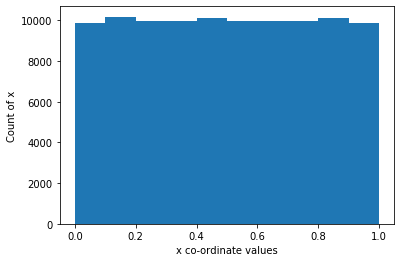

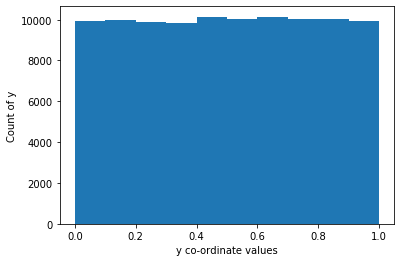

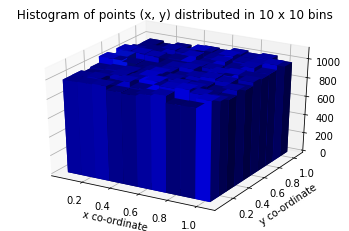

In [10]:
if __name__ == "__main__":
    
    fromNumberOfPoints = 10**5  
    """ To view single example of distribution keep toNumberOfPoints = 10**5"""
    toNumberOfPoints = 10**5    
    stepIncrement = 10**5
    
    numberOfPoints , calculatedPi = calculatePiForNPoints ( fromNumberOfPoints, 
                toNumberOfPoints + stepIncrement, stepIncrement )
    
    #plotCalculatedVsActualPi( numberOfPoints , calculatedPi )

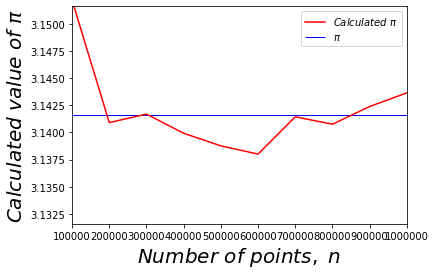

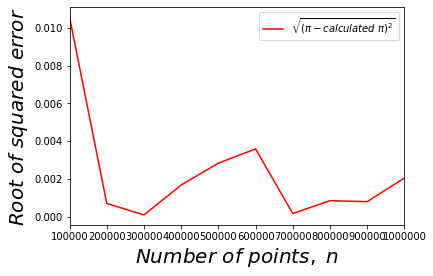

In [13]:
if __name__ == "__main__":
    
    fromNumberOfPoints = 10**5  
    """ To view single example of distribution keep toNumberOfPoints = 10**5"""
    toNumberOfPoints = 10**6    
    stepIncrement = 10**5
    
    numberOfPoints , calculatedPi = calculatePiForNPoints ( fromNumberOfPoints, 
                toNumberOfPoints + stepIncrement, stepIncrement )
    
    plotCalculatedVsActualPi( numberOfPoints , calculatedPi )
    
    plotRootOfSquareError( numberOfPoints , calculatedPi )